In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import requests 
import hvplot.pandas

# Import API key
from api_keys import geoapify_key

# horse racing files 
race_details_path = "Resources/race_details_20240101_20240131.csv"
race_results_path = "Resources/race_results_20240101_20240131.csv"

# Read both datasets
race_details = pd.read_csv(race_details_path)
race_results = pd.read_csv(race_results_path)

# Combine the data into a single DataFrame

# Merge the datasets on the columns 'race_date', 'race_city', and 'race_no'
combined = pd.merge(race_details, race_results, on=['race_date', 'race_city', 'race_no'])

# Save the merged DataFrame to a new CSV file
combined.to_csv('path_to_combined_dataset.csv', index=False)

# Display the data table for preview

combined.head()

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,...,horse_owner,horse_trainer,horse_race_degree,horse_win_value,horse_psf_rate,horse_psf_rank,Horse_starting_box_no,horse_margin,horse_late_start,horse_rate
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,NİMET ARİF KURTEL,TAMER TURAN,1.31.26,1.50,49,1,1,9 Lengths,NaN,42
1,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,AHMET KURT,TUNCAY PELEN,1.33.05,3.75,20,2,4,Half Lengths,NaN,43
2,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,BÜLENT BAYBURAN,KAZIM ŞENGEL,1.33.17,28.70,3,6,3,3 Lengths,NaN,33
3,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,DİLEK ÖKTEN,ALİ RIZA AYDIN,1.33.65,14.85,3,5,6,4 Lengths,NaN,39
4,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,SEMİH KATI,MURAT TÜRKOĞLU,1.34.30,4.55,17,3,5,NaN,NaN,51


In [5]:
#data cleaning
#columns to drop: horse_origin, 
clean = combined.drop(['horse_origin'], axis=1)

#columns to clean: horse_age(drop 'y')

clean['horse_age'] = combined['horse_age'].str.replace('y', '', regex=False)
clean

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,...,horse_owner,horse_trainer,horse_race_degree,horse_win_value,horse_psf_rate,horse_psf_rank,Horse_starting_box_no,horse_margin,horse_late_start,horse_rate
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,NİMET ARİF KURTEL,TAMER TURAN,1.31.26,1.50,49,1,1,9 Lengths,NaN,42
1,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,AHMET KURT,TUNCAY PELEN,1.33.05,3.75,20,2,4,Half Lengths,NaN,43
2,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,BÜLENT BAYBURAN,KAZIM ŞENGEL,1.33.17,28.70,3,6,3,3 Lengths,NaN,33
3,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,DİLEK ÖKTEN,ALİ RIZA AYDIN,1.33.65,14.85,3,5,6,4 Lengths,NaN,39
4,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,SEMİH KATI,MURAT TÜRKOĞLU,1.34.30,4.55,17,3,5,NaN,NaN,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278,2024-01-31,Şanlıurfa,8,Handicap 14,Undefined,4 Years Old,Arabian,1700,Dirt,Good Going,...,MEHMET ŞAH ATAKAYA,YELİZ BAYSAL,2.17.56,20.50,3,11,7,NaN,NaN,42
4279,2024-01-31,Şanlıurfa,8,Handicap 14,Undefined,4 Years Old,Arabian,1700,Dirt,Good Going,...,MAHMUT TEKİN,MAHSUM BARCİN,2.17.92,34.90,2,14,8,NaN,NaN,32
4280,2024-01-31,Şanlıurfa,8,Handicap 14,Undefined,4 Years Old,Arabian,1700,Dirt,Good Going,...,ALİ POLAT,MURAT ALTIN,2.18.09,9.45,5,7,6,NaN,NaN,34
4281,2024-01-31,Şanlıurfa,8,Handicap 14,Undefined,4 Years Old,Arabian,1700,Dirt,Good Going,...,HÜSEYİN ÇELİK,MEHMET DEMİROL,2.20.75,24.35,2,15,9,NaN,NaN,42


In [12]:
#Check unique counts for each column to explore the perspectives we should be analyzing

for column in clean.columns:
    unique_value_count = clean[column].nunique()
    print(f"Unique value count in {column}: {unique_value_count}")

Unique value count in race_date: 31
Unique value count in race_city: 7
Unique value count in race_no: 9
Unique value count in race_type: 20
Unique value count in race_sex_group: 2
Unique value count in race_age_group: 3
Unique value count in race_race_group: 2
Unique value count in race_length: 11
Unique value count in race_track_type: 2
Unique value count in race_track_condition: 4
Unique value count in best_rating: 101
Unique value count in result: 19
Unique value count in horse_name: 2468
Unique value count in horse_accessories: 61
Unique value count in horse_age: 9
Unique value count in horse_sex: 2
Unique value count in horse_sire: 397
Unique value count in horse_dam: 2149
Unique value count in hors_broodmare_sire: 584
Unique value count in jockey_weight: 15
Unique value count in jockey_name: 189
Unique value count in horse_owner: 1422
Unique value count in horse_trainer: 476
Unique value count in horse_race_degree: 3169
Unique value count in horse_win_value: 1093
Unique value cou

In [13]:
#Calculate the total number of unique races
'''
Count the unique values of the combination of race date, race city and race number should produce the total race numbers.
This is an important filter, otherwise we are duplicating the race type counts.
'''
# Create a unique identifier for each race. This added one column to the dataframe
clean['unique_race_identifier'] = clean['race_date'].astype(str) + '_' + clean['race_city'].astype(str) + '_' + clean['race_no'].astype(str)
# Count the unique races
total_race_count = clean['unique_race_identifier'].nunique()

print(f"Total number of races: {total_race_count}")

Total number of races: 480


In [14]:
# Save the cleaned DataFrame to a new CSV file
clean.to_csv('clean.csv', index=False)


In [26]:
#Find out race type distribution#What are the counts of each race type? 
#Interestingly, the change to unique race type didn't change the percentage of each type.
unique_race_counts_by_type = clean.groupby('race_type')['unique_race_identifier'].nunique()
unique_race_counts_by_type

race_type
Condition 1      9
Condition 2     18
Condition 3     59
Condition 4     61
Condition 5     25
Condition-6     23
Condition-7      3
Condition-8     15
Condition-9      1
G 3              2
Handicap 13     10
Handicap 14     56
Handicap 15     49
Handicap 16     21
Handicap 17      7
Handicap 21      8
Maiden         103
Sale 1           6
Sale 2           3
Sale 3           1
Name: unique_race_identifier, dtype: int64

In [27]:
#Since there are a lot of race types to display, we are using Pareto rule 
#find out the race types that make up 80% of the total race types and aggregate other types as one variable.

unique_race_type_percentages = unique_race_counts_by_type / total_race_count

# Calculate cumulative percentage and find the 80% threshold
#calculate comulative percentage of each type
cumulative_percentage = np.cumsum(unique_race_type_percentages)
#filter down to only the ones
race_types_80 = unique_race_type_percentages[cumulative_percentage <= 0.80]
other_percentage = 1 - race_types_80.sum()

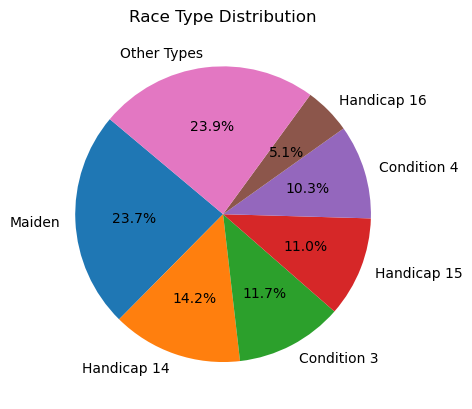

In [79]:

# Creating a new Series for the plot
plot_type_distribution = race_types_80

#Add other types to plot_data
if other_percentage > 0:
    plot_type_distribution['Other Types'] = other_percentage

# Plotting
plot_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Race Type Distribution')
plt.ylabel('')  
plt.savefig('race_type_distribution.png')
plt.show()

In [17]:


# Group by 'race_sex_group' and count unique 'unique_race_identifier'
races_per_sex_group = clean.groupby('race_sex_group')['unique_race_identifier'].nunique()

print(races_per_sex_group)

race_sex_group
Female       118
Undefined    362
Name: unique_race_identifier, dtype: int64


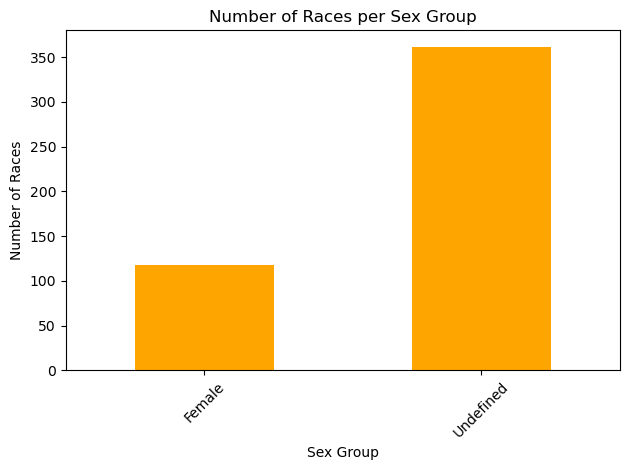

In [80]:
#Plot

races_per_sex_group.plot(kind='bar', color='orange')
plt.title('Number of Races per Sex Group')
plt.xlabel('Sex Group')
plt.ylabel('Number of Races')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.savefig('races_per_sex_group.png')
plt.show()

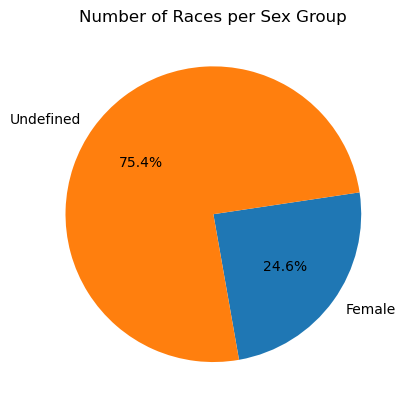

In [27]:
# Plotting a pie chart for race sex group
races_per_sex_group.plot(kind='pie', autopct='%1.1f%%',startangle=280)
plt.title('Number of Races per Sex Group')
plt.ylabel('')  
plt.savefig('races_per_sex_group_pie.png')
plt.show()

In [28]:
#Which starting box numbers are likely to have more wins?
# Not every race has the same number of starting boxes. Some can be more and some less. 
#So firstly we count how many times each box positions were used in the races in the DataFrame
total_box_start_counts = clean['Horse_starting_box_no'].value_counts()
total_box_start_counts

Horse_starting_box_no
2     475
3     473
1     472
4     467
5     463
6     420
7     360
8     313
9     249
10    200
11    144
12     96
13     63
14     44
15     21
16     13
17      6
18      4
Name: count, dtype: int64

In [ ]:
#What are the race distance distribution of each winning starting box number

In [29]:
#Which starting box numbers are likely to have more wins?
rank_1_df = clean[clean['result'] == 1]

# Count occurrences of each 'Horse_starting_box_no' in the filtered DataFrame
winning_box_start_counts = rank_1_df['Horse_starting_box_no'].value_counts()

winning_box_start_counts

Horse_starting_box_no
3     59
4     58
1     57
2     57
5     56
6     55
7     33
8     30
9     24
10    21
11    11
12     9
14     5
13     3
16     2
15     1
Name: count, dtype: int64

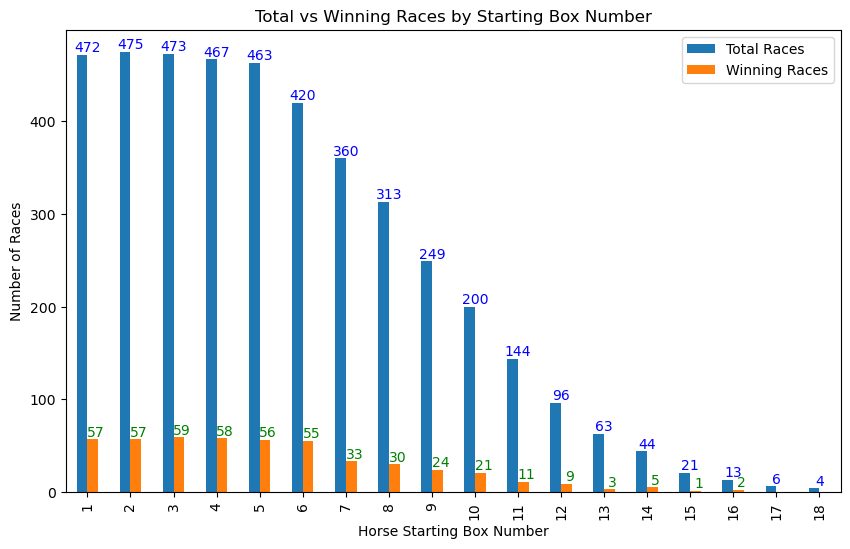

In [38]:
# Plotting a bar chart to show total number of starting

# Create a DataFrame from the two Series for easier plotting
df_starting_box = pd.DataFrame({
    'Total Races': total_box_start_counts,
    'Winning Races': winning_box_start_counts
})

# Now plot the DataFrame
ax = df_starting_box.plot(kind='bar', figsize=(10, 6), title="Total vs Winning Races by Starting Box Number")
ax.set_xlabel("Horse Starting Box Number")
ax.set_ylabel("Number of Races")

# Adding race numbers on top of the bars for total races
for index, value in enumerate(df_starting_box['Total Races']):
    label = f"{int(value)}" if pd.notnull(value) else ""
    ax.text(index, value if pd.notnull(value) else 0, label, color='blue', ha='center', va='bottom')
    #ax.text(index, value,f"{int(value)}", color='blue', ha='center', va='bottom')

# Adding race numbers on top of the bars for winning races
for index, value in enumerate(df_starting_box['Winning Races']):
    label = f"{int(value)}" if pd.notnull(value) else ""
    ax.text(index + 0.2, value if pd.notnull(value) else 0, label, color='green', ha='center', va='bottom')

plt.show()

In [ ]:
winning_percentage = (winning_box_start_counts / total_box_start_counts * 100).sort_index().dropna()

# Sort the winning percentages in descending order
winning_percentage_sorted = winning_percentage.sort_values(ascending=False)

print(winning_percentage_sorted)

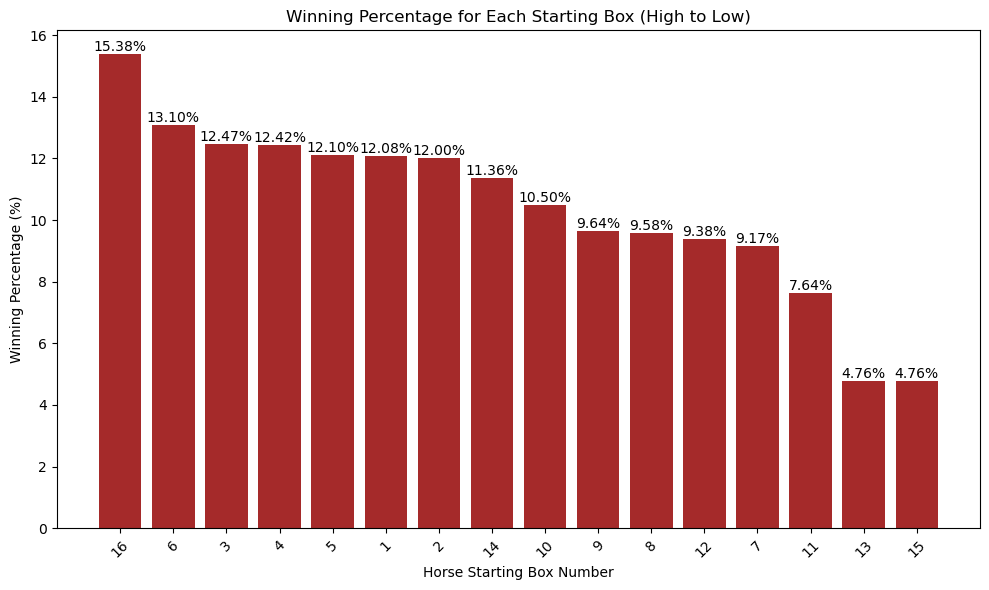

In [81]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(winning_percentage_sorted.index.astype(str), winning_percentage_sorted, color='brown')
plt.title('Winning Percentage for Each Starting Box (High to Low)')
plt.xlabel('Horse Starting Box Number')
plt.ylabel('Winning Percentage (%)')
plt.xticks(rotation=45)

# Adding the percentage on top of each bar
for index, value in enumerate(winning_percentage_sorted):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('Winning_percentage')
plt.show()

In [85]:
# What are the unique race cities in the dataset? Use API to show these cities on a map.
unique_cities = clean['race_city'].unique()
unique_cities

array(['Bursa', 'Adana', 'Antalya', 'İstanbul', 'İzmir', 'Kocaeli',
       'Şanlıurfa'], dtype=object)

In [97]:
races_per_city = clean.groupby('race_city')['unique_race_identifier'].nunique()
races_per_city

race_city
Adana        100
Antalya       75
Bursa         45
Kocaeli       36
İstanbul      72
İzmir         86
Şanlıurfa     66
Name: unique_race_identifier, dtype: int64

In [88]:
#First get the coordinates of these cities

api_key = geoapify_key  # Replace with your Geoapify API key
cities = ['Bursa', 'Adana', 'Antalya', 'İstanbul', 'İzmir', 'Kocaeli',
       'Şanlıurfa']

for city in cities:
    response = requests.get(f'https://api.geoapify.com/v1/geocode/search?text={city}&apiKey={api_key}')
    if response.status_code == 200:
        data = response.json()
        # Extracting latitude and longitude from the first result
        lat = data['features'][0]['geometry']['coordinates'][1]
        lon = data['features'][0]['geometry']['coordinates'][0]
        print(f'{city}: Latitude: {lat}, Longitude: {lon}')
    else:
        print(f'Failed to get data for {city}')

Bursa: Latitude: 40.182737, Longitude: 29.0675481
Adana: Latitude: 36.9863599, Longitude: 35.3252861
Antalya: Latitude: 36.8864752, Longitude: 30.7029585
İstanbul: Latitude: 41.006381, Longitude: 28.9758715
İzmir: Latitude: 38.4237433, Longitude: 27.1428019
Kocaeli: Latitude: 40.8216536, Longitude: 29.9507184
Şanlıurfa: Latitude: 37.2595198, Longitude: 39.0408174


In [112]:
#Plot the map

# Create a DataFrame with the city data
race_city_coordinates = {
    'City': ['Bursa', 'Adana', 'Antalya', 'İstanbul', 'İzmir', 'Kocaeli', 'Şanlıurfa'],
    'Latitude': [40.182737, 36.9863599, 36.8864752, 41.006381, 38.4237433, 40.8216536, 37.2595198],
    'Longitude': [29.0675481, 35.3252861, 30.7029585, 28.9758715, 27.1428019, 29.9507184, 39.0408174],
    'Color': ['red', 'green', 'blue', 'orange','purple','brown','pink'],
    'number_of_races': [45, 100, 75, 72, 86, 36, 66]
}

race_city_coordinates_df = pd.DataFrame(race_city_coordinates)
# Scale the number_of_races by a factor to increase the dot sizes
scale_factor = 5  
race_city_coordinates_df['scaled_number_of_races'] = race_city_coordinates_df['number_of_races'] * scale_factor

# Using hvplot to create a scatter plot on a tile source
plot = race_city_coordinates_df.hvplot.points('Longitude', 'Latitude', geo=True, tiles='OSM', color='Color', size='scaled_number_of_races', line_color='black', hover_cols=['City'])

plot

#Might need to use matplotlib if we want to save the image as png

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Color,scaled_number_of_races,City)

<Figure size 640x480 with 0 Axes>